In [76]:
#librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
#Carga desde un archivo .csv sin indice y eliminar filas innecesarias
Chicago= pd.read_csv('Listings Final Chicago.csv')

In [78]:
#Identificar valores nulos por columna
Valores_Nulos= Chicago.isnull().sum()
Columnas_Con_Nulos = Valores_Nulos[Valores_Nulos > 0]
Columnas_Con_Nulos

,0
description,204
neighborhood_overview,2560
host_location,1423
host_about,2597
host_response_time,334
host_response_rate,334
host_acceptance_rate,306
host_is_superhost,190
host_neighbourhood,207
neighbourhood,2559


In [79]:
#Información tipos de columnas
Tipos_Columnas = Chicago[Columnas_Con_Nulos.index].dtypes
Columnas_Object = Tipos_Columnas[Tipos_Columnas == 'object']
Columnas_Object

,0
description,object
neighborhood_overview,object
host_location,object
host_about,object
host_response_time,object
host_response_rate,object
host_acceptance_rate,object
host_is_superhost,object
host_neighbourhood,object
neighbourhood,object


In [80]:
#Información tipos de columnas
Tipos_Columnas = Chicago[Columnas_Con_Nulos.index].dtypes
Columnas_Object = Tipos_Columnas[Tipos_Columnas == 'float']
Columnas_Object

,0
neighbourhood_group_cleansed,float64
bathrooms,float64
bedrooms,float64
beds,float64
calendar_updated,float64
review_scores_rating,float64
review_scores_accuracy,float64
review_scores_cleanliness,float64
review_scores_checkin,float64
review_scores_communication,float64


In [82]:
#Realizamos una copia del dataframe
copia_Chicago= Chicago.copy()

In [83]:
#Convertir la variable price a numerico
copia_Chicago['price'] = copia_Chicago['price'].replace('[\$,]', '', regex=True).astype(float)

In [84]:
#Eliminamos esta columna ya que todos los datos son nulos
copia_Chicago= copia_Chicago.drop(columns=['neighbourhood_group_cleansed'])
copia_Chicago= copia_Chicago.drop(columns=['calendar_updated'])

In [85]:
#Sustituir valores nulos por un string en  concreto
copia_Chicago["description"] = copia_Chicago["description"].fillna("DESCRIPCIÓN FALTANTE")
copia_Chicago["neighborhood_overview"] = copia_Chicago["neighborhood_overview"].fillna("SIN INFORMACIÓN")
copia_Chicago["host_location"] = copia_Chicago["host_location"].fillna("SIN INFORMACIÓN")
copia_Chicago["host_about"] = copia_Chicago["host_about"].fillna("SIN INFORMACIÓN")
copia_Chicago["host_response_time"] = copia_Chicago["host_response_time"].fillna("SIN INFORMACIÓN")
copia_Chicago["host_response_rate"] = copia_Chicago["host_response_rate"].fillna("SIN INFORMACIÓN")
copia_Chicago["host_acceptance_rate"] = copia_Chicago["host_acceptance_rate"].fillna("SIN INFORMACIÓN")
copia_Chicago["host_is_superhost"] = copia_Chicago["host_is_superhost"].fillna("VALIDACIÓN PENDIENTE")
copia_Chicago["host_neighbourhood"] = copia_Chicago["host_neighbourhood"].fillna("SIN INFORMACIÓN")
copia_Chicago["neighbourhood"] = copia_Chicago["neighbourhood"].fillna("SIN INFORMACIÓN")
copia_Chicago["bathrooms_text"] = copia_Chicago["bathrooms_text"].fillna("INFORMACIÓN FALTANTE")
copia_Chicago["has_availability"] = copia_Chicago["has_availability"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Chicago["first_review"] = copia_Chicago["first_review"].fillna("SIN RESEÑA")
copia_Chicago["last_review"] = copia_Chicago["last_review"].fillna("SIN RESEÑA")
copia_Chicago["license"] = copia_Chicago["license"].fillna("SIN LICENCIA")

In [86]:
#Sustituir valores nulos con promedio o media
copia_Chicago["review_scores_rating"] = copia_Chicago["review_scores_rating"].fillna(round(copia_Chicago["review_scores_rating"].mean(), 1))
copia_Chicago["review_scores_accuracy"] = copia_Chicago["review_scores_accuracy"].fillna(round(copia_Chicago["review_scores_accuracy"].mean(), 1))
copia_Chicago["review_scores_cleanliness"] = copia_Chicago["review_scores_cleanliness"].fillna(round(copia_Chicago["review_scores_cleanliness"].mean(), 1))
copia_Chicago["review_scores_checkin"] = copia_Chicago["review_scores_checkin"].fillna(round(copia_Chicago["review_scores_checkin"].mean(), 1))
copia_Chicago["review_scores_communication"] = copia_Chicago["review_scores_communication"].fillna(round(copia_Chicago["review_scores_communication"].mean(), 1))
copia_Chicago["review_scores_location"] = copia_Chicago["review_scores_location"].fillna(round(copia_Chicago["review_scores_location"].mean(), 1))
copia_Chicago["review_scores_value"] = copia_Chicago["review_scores_value"].fillna(round(copia_Chicago["review_scores_value"].mean(), 1))
copia_Chicago["reviews_per_month"] = copia_Chicago["reviews_per_month"].fillna(round(copia_Chicago["reviews_per_month"].mean(), 1))
copia_Chicago["price"] = copia_Chicago["price"].fillna(round(copia_Chicago["price"].mean(), 1))

In [87]:
#Sustituir valores nulos por un valor numérico en  concreto
copia_Chicago["beds"]=copia_Chicago["beds"].fillna("-")
copia_Chicago["bedrooms"]=copia_Chicago["bedrooms"].fillna("-")
copia_Chicago["bathrooms"]=copia_Chicago["bathrooms"].fillna("-")

In [88]:
#Corroboramos valores nulos
# Ajustar maximo de filas
pd.options.display.max_rows = None
valores_nulos=copia_Chicago.isnull().sum()
valores_nulos

,0
id,0
listing_url,0
scrape_id,0
last_scraped,0
source,0
name,0
description,0
neighborhood_overview,0
picture_url,0
host_id,0


In [89]:
#Seleccionar variables relevantes
Chicago_variables = copia_Chicago[['listing_url', 'last_scraped', 'source', 'name', 'host_url', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'has_availability', 'number_of_reviews', 'review_scores_rating', 'instant_bookable', 'calculated_host_listings_count', 'reviews_per_month']]

In [90]:
#ELIMINAR OUTLIERS POR EL METODO DE DESVIACION ESTANDAR
#Separar por columnas cualitativas y cuantitativas
columnas_cualitativas = Chicago_variables.select_dtypes(include = 'object')
columnas_cuantitativas = Chicago_variables.select_dtypes(include = ['int64', 'float64'])

<Figure size 2000x1000 with 0 Axes>

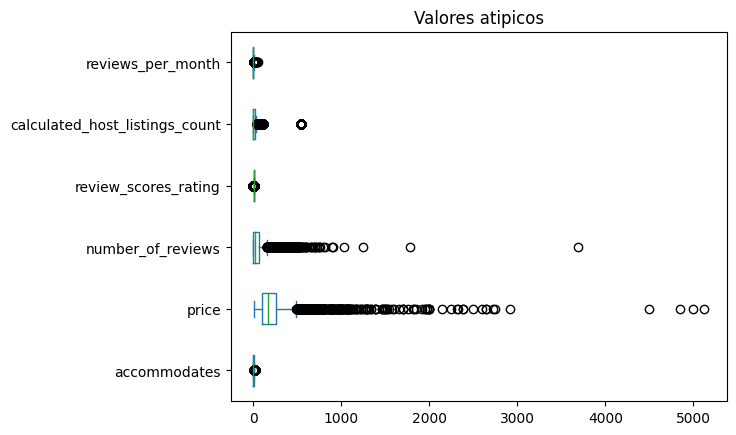

In [91]:
#Hacer un boxplot de valores atipicos de las columnas cuantitativas
fig = plt.figure(figsize = (20, 10))
columnas_cuantitativas.plot(kind = 'box', vert = False)
plt.title("Valores atipicos")
plt.show()

In [92]:
#Identificar los limites superior e inferior
y = columnas_cuantitativas
Limite_superior = y.mean() + 3*y.std()
Limite_inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_superior)
print("Limite inferior permitido", Limite_inferior)

Limite superior permitido accommodates                       13.541243
price                             945.637844
number_of_reviews                 348.510118
review_scores_rating                5.886191
calculated_host_listings_count    460.781215
reviews_per_month                   7.432146
dtype: float64
Limite inferior permitido accommodates                       -4.749995
price                            -494.608418
number_of_reviews                -243.430893
review_scores_rating                3.647901
calculated_host_listings_count   -365.208277
reviews_per_month                  -3.607903
dtype: float64


In [93]:
#Filtrar solo por columnas dentro de los limites
columnas_cuantitativas_sin_outliers = columnas_cuantitativas[(y <= Limite_superior) & (y >= Limite_inferior)]

In [94]:
#Revisar valores nulos
valores_nulos_cuantitativo = columnas_cuantitativas_sin_outliers.isnull().sum()
valores_nulos_cuantitativo

,0
accommodates,210
price,146
number_of_reviews,142
review_scores_rating,124
calculated_host_listings_count,549
reviews_per_month,61


In [96]:
#Hacer una copia del dataframe y rellenar los valores nulos con la media
columnas_cuantitativas_limpio = columnas_cuantitativas_sin_outliers.copy()
columnas_cuantitativas_limpio = columnas_cuantitativas_limpio.fillna(round(columnas_cuantitativas_sin_outliers.mean(), 1))

In [97]:
#Se juntan las columnas cualitativas con las cuantitativas
Chicago_outliers = pd.concat([columnas_cuantitativas_limpio, columnas_cualitativas], axis = 1)
Chicago_outliers.head()

,accommodates,price,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month,listing_url,last_scraped,source,name,...,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,bedrooms,beds,amenities,has_availability,instant_bookable
0,5.0,103.0,216.0,4.78,1.0,2.41,https://www.airbnb.com/rooms/16757056,2024-06-21,city scrape,Heart of Chicago 2BD + Parking,...,t,Lower West Side,Entire rental unit,Entire home/apt,1 bath,2.0,3.0,"[""Shampoo"", ""Dedicated workspace"", ""Wifi"", ""Pr...",t,f
1,6.0,169.0,71.0,4.73,1.0,1.74,https://www.airbnb.com/rooms/48112045,2024-06-21,city scrape,West Town Chicago Apt near Metra and United Ce...,...,f,West Town,Entire rental unit,Entire home/apt,1 bath,2.0,2.0,"[""Shampoo"", ""Dining table"", ""Window AC unit"", ...",t,f
2,4.0,128.0,1.0,5.00,6.0,0.31,https://www.airbnb.com/rooms/1089958767588000931,2024-06-21,city scrape,Nice 2bd 1ba w/ gated entrance!,...,t,Near West Side,Entire rental unit,Entire home/apt,1 bath,2.0,2.0,"[""Shampoo"", ""Wifi"", ""Bed linens"", ""Freezer"", ""...",t,t
3,3.0,96.0,43.0,4.93,1.0,0.58,https://www.airbnb.com/rooms/24694181,2024-06-21,city scrape,Talman Ave,...,t,Lincoln Square,Entire rental unit,Entire home/apt,1 bath,1.0,4.0,"[""Shampoo"", ""Ethernet connection"", ""Dedicated ...",t,f
4,6.0,315.0,6.0,4.67,1.0,0.46,https://www.airbnb.com/rooms/639920368906600737,2024-06-21,city scrape,Historic brownstone in the heart of Old Town!,...,t,Lincoln Park,Entire home,Entire home/apt,2 baths,2.0,2.0,"[""Crib - always at the listing"", ""Shampoo"", ""D...",t,f


In [98]:
#Comprobamos que no existan valores nulos
valores_nulos_Chicago_outliers = Chicago_outliers.isnull().sum()
valores_nulos_Chicago_outliers

,0
accommodates,0
price,0
number_of_reviews,0
review_scores_rating,0
calculated_host_listings_count,0
reviews_per_month,0
listing_url,0
last_scraped,0
source,0
name,0


In [102]:
#Convertir archivo filtrado a CSV
Chicago_outliers.to_csv("Chicago sin outliers.csv")

In [103]:
#Descargar archivo en csv
from google.colab import files
files.download("Chicago sin outliers.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>